# <font color="cyan"> SOCIAL MEDIA SENTIMENT ANALYSIS

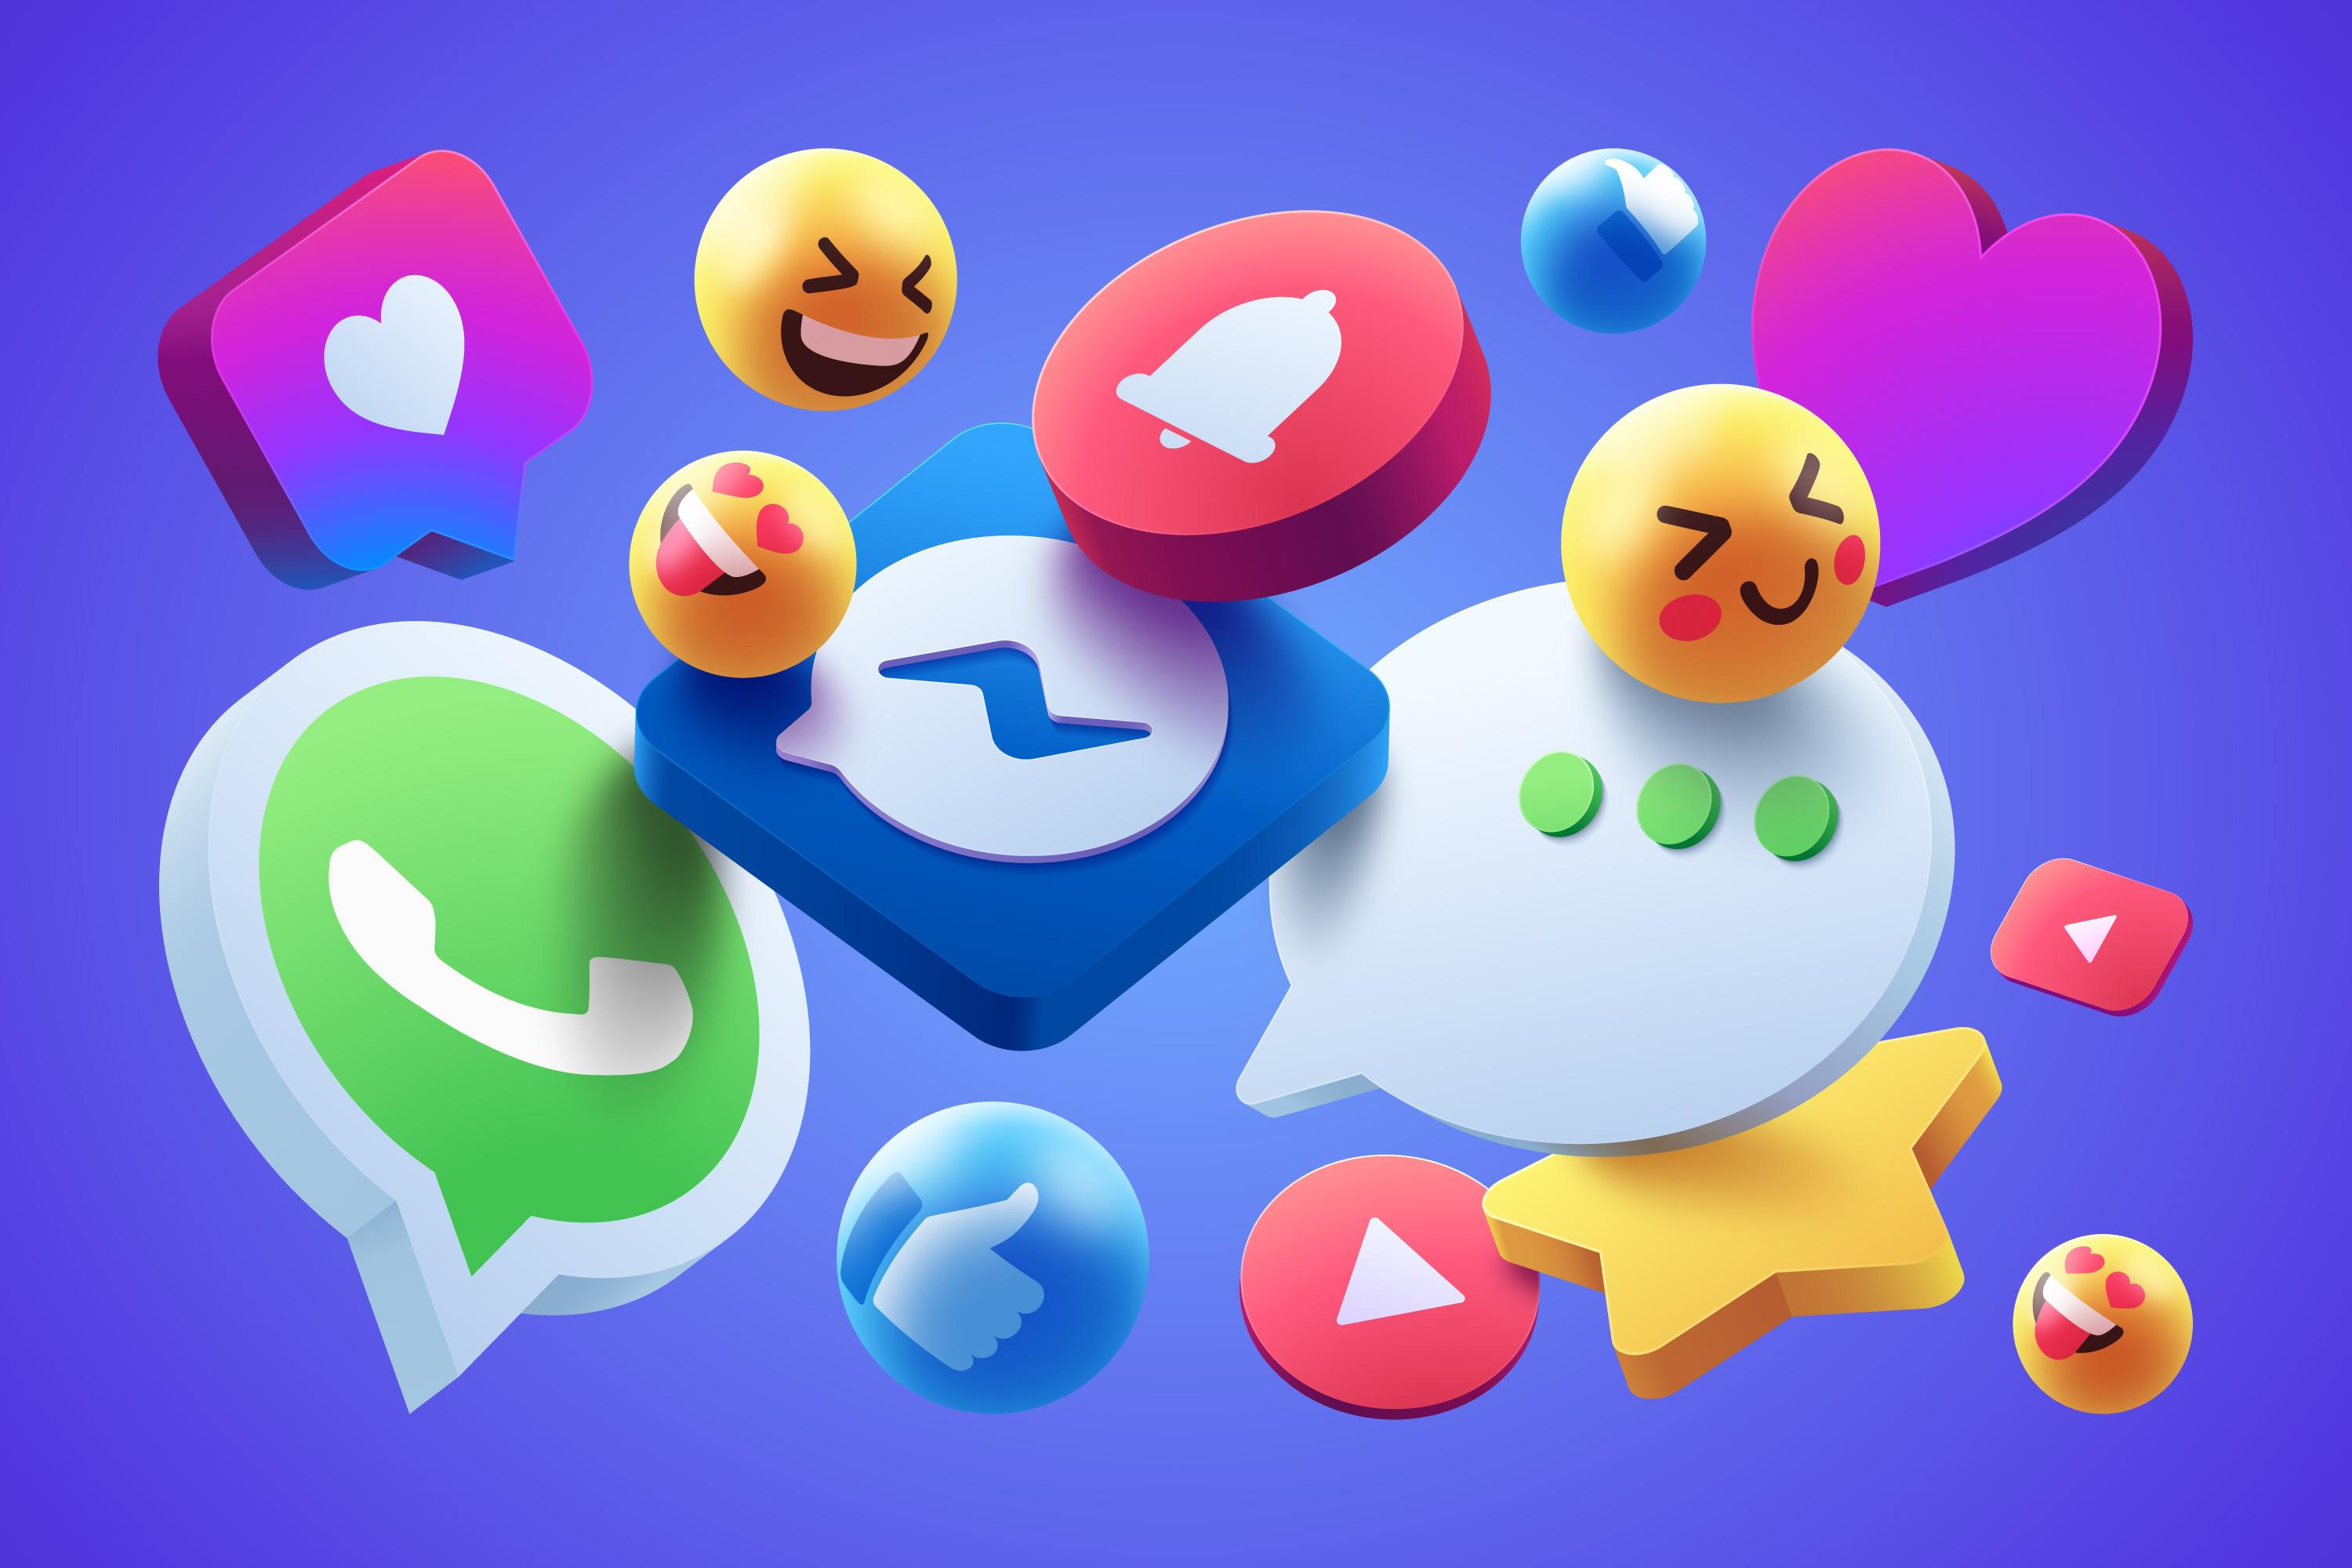

In [2]:
from IPython.display import display,Image
display(Image('social.jpg')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from textblob import TextBlob

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [2]:
df=pd.read_csv("sentiment.csv",encoding="utf8")
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8


In [3]:
df['Platform']=df['Platform'].str.strip()       

In [4]:
df['Platform']=df['Platform'].str.strip()

In [5]:
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

In [6]:
# Trim Pltform   
df['Platform']=df['Platform'].str.strip()

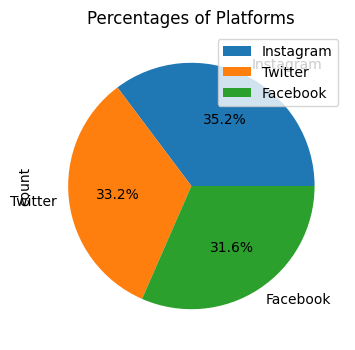

In [8]:
plt.figure(figsize=(4,4))
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

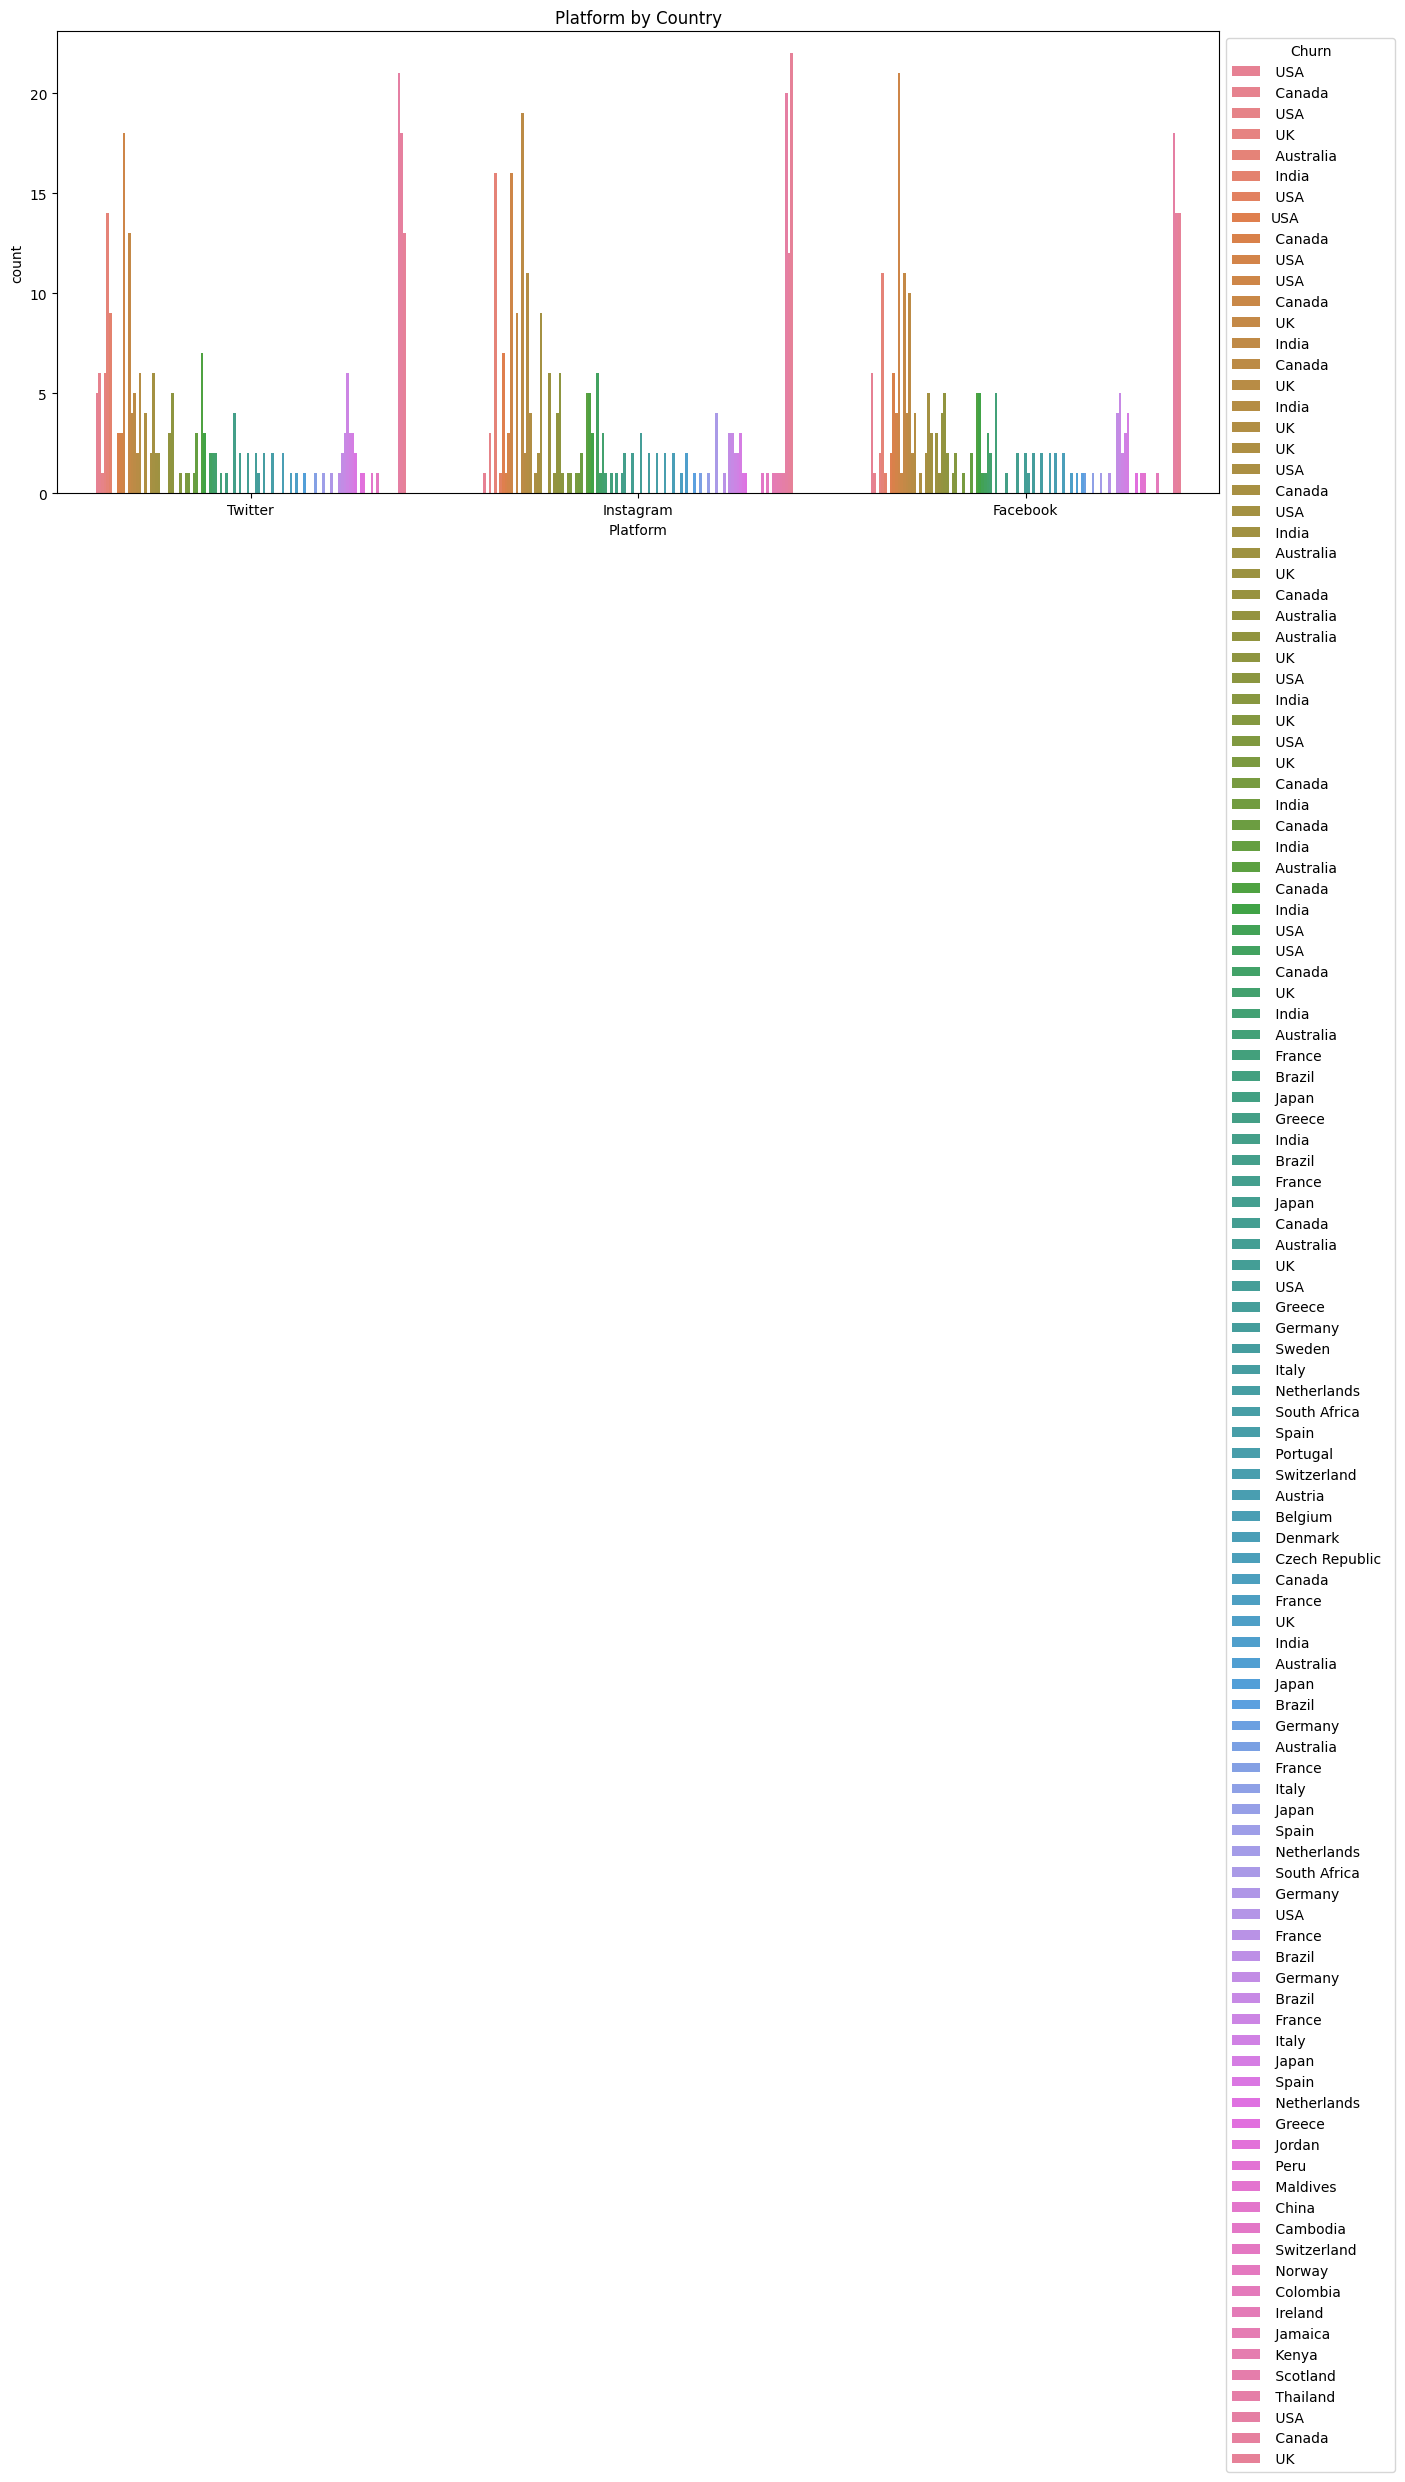

In [9]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = "Platform" , data = df ,hue = "Country")
plt.legend(title="Churn", bbox_to_anchor = (1,1))
plt.title("Platform by Country" , fontsize =12 )
plt.show()

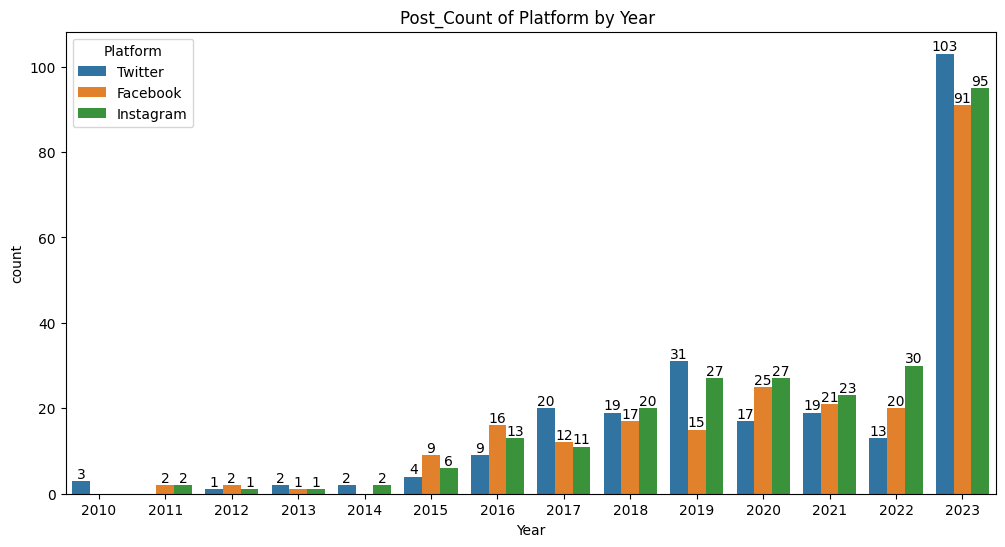

In [10]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "Year" , data = df, hue = "Platform" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Post_Count of Platform by Year " , fontsize = 12 )
plt.xticks
plt.show()

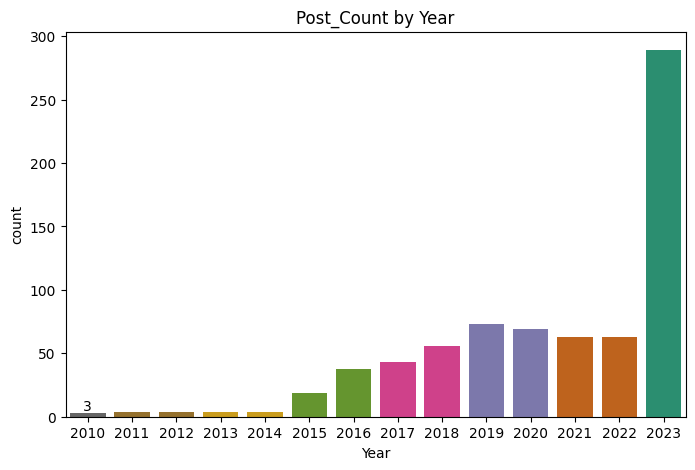

In [67]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "Year" , data = df , palette="Dark2_r")
ax.bar_label(ax.containers[0])
plt.title("Post_Count by Year" , fontsize =12 )
plt.show()

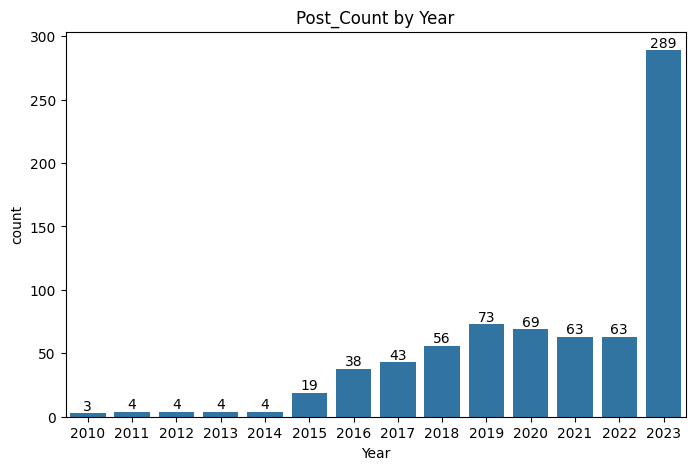

In [12]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "Year" , data =df)
ax.bar_label(ax.containers[0])
plt.title("Post_Count by Year" , fontsize =12 )
plt.show()

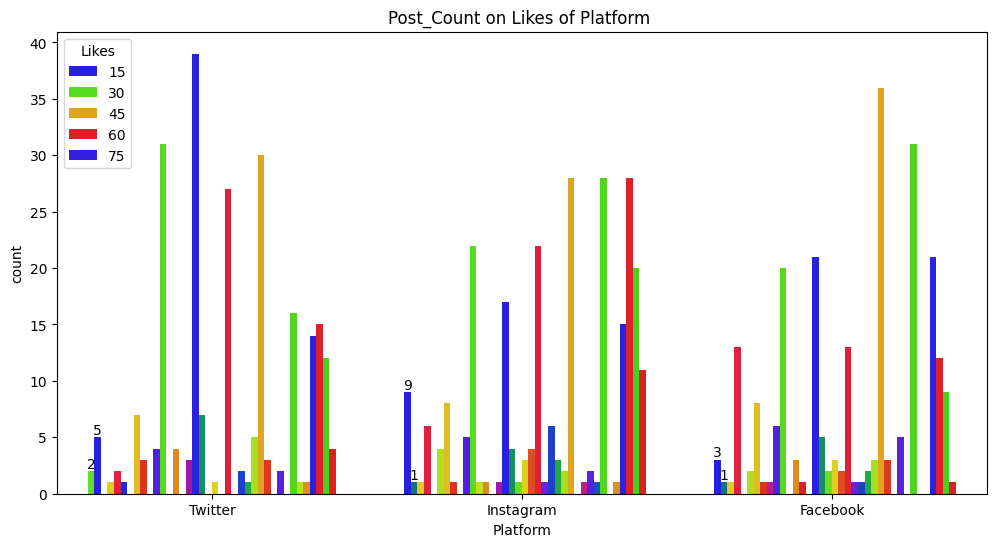

In [210]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "Platform" , data = df, hue = "Likes" ,palette='prism_r')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Post_Count on Likes of Platform " , fontsize = 12 )
plt.xticks
plt.show()

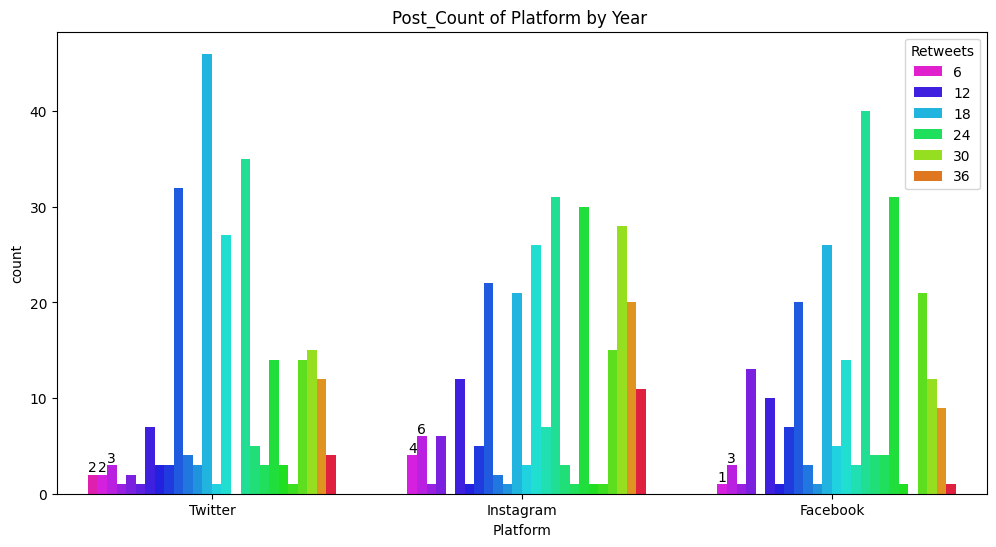

In [57]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "Platform" , data = df, hue = "Retweets" ,palette='gist_rainbow_r')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Post_Count of Platform by Year " , fontsize = 12 )
plt.xticks
plt.show()

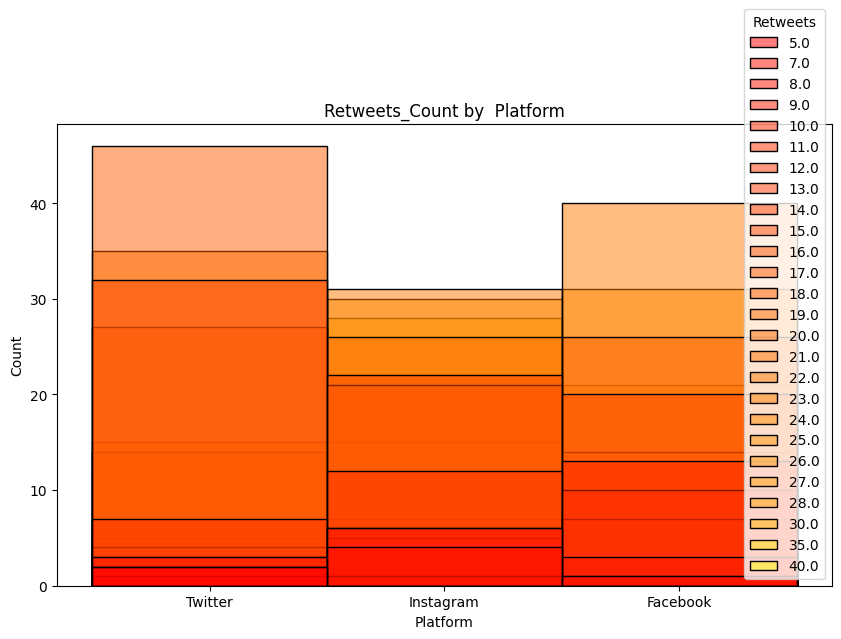

In [64]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x = "Platform" , data =df ,bins= 50 , hue = "Retweets",palette='autumn')
plt.title("Retweets_Count by  Platform" , fontsize = 12)
plt.show()

In [212]:
f=df.groupby('Year')['Retweets'].sum().reset_index()
f

,Year,Retweets
0,2010,80.0
1,2011,91.0
2,2012,80.0
3,2013,88.0
4,2014,80.0
5,2015,434.0
6,2016,836.0
7,2017,892.0
8,2018,1253.0
9,2019,1611.0


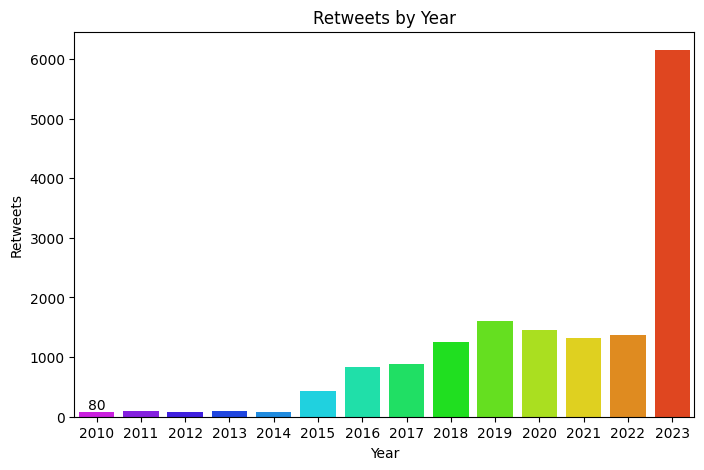

In [214]:
f=df.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize = (8,5))
ax = sns.barplot(x = "Year" , y='Retweets', data = f,palette='gist_rainbow_r')
ax.bar_label(ax.containers[0])
plt.title("Retweets by Year" , fontsize =12 )
plt.show()

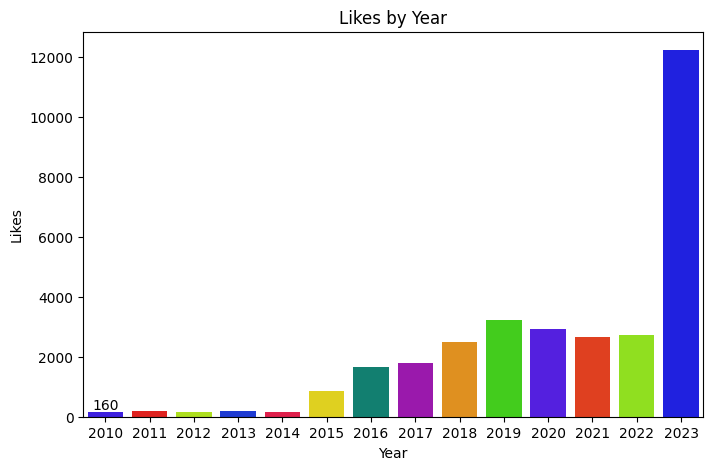

In [231]:
f=df.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize = (8,5))
ax = sns.barplot(x = "Year" , y='Likes', data = f,palette='prism_r')
ax.bar_label(ax.containers[0])
plt.title("Likes by Year" , fontsize =12 )
plt.show()

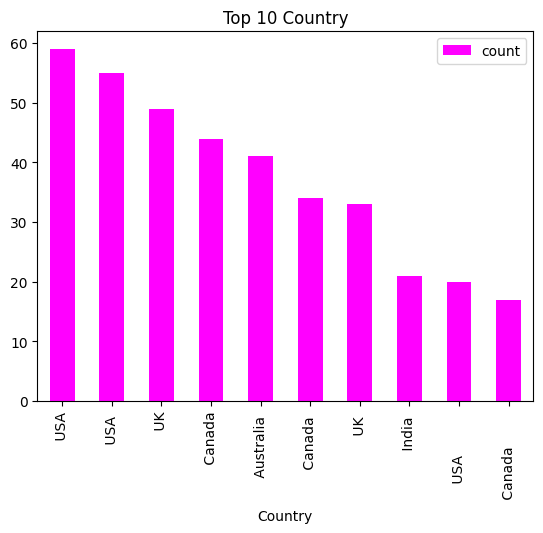

In [78]:
df['Country'].value_counts().nlargest(10).plot(kind='bar',cmap="spring")
plt.title('Top 10 Country')
plt.legend()
plt.show()

## Data Manipulations 

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Hour'] = df['Hour'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  732 non-null    int64         
 1   Unnamed: 0    732 non-null    int64         
 2   Text          732 non-null    object        
 3   Sentiment     732 non-null    object        
 4   Timestamp     732 non-null    datetime64[ns]
 5   User          732 non-null    object        
 6   Platform      732 non-null    object        
 7   Hashtags      732 non-null    object        
 8   Retweets      732 non-null    float64       
 9   Likes         732 non-null    float64       
 10  Country       732 non-null    object        
 11  Year          732 non-null    int32         
 12  Month         732 non-null    int32         
 13  Day           732 non-null    int32         
 14  Hour          732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(

In [19]:
df.shape

(732, 15)

In [20]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [21]:
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [22]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,Retweets,Likes,Year,Month,Day,Hour
Retweets,1.000000,0.998482,-0.039982,0.073265,0.009213,0.196955
Likes,0.998482,1.000000,-0.043415,0.066643,0.011489,0.195331
Year,-0.039982,-0.043415,1.000000,-0.314845,0.021973,-0.087470
Month,0.073265,0.066643,-0.314845,1.000000,-0.135873,0.137835
Day,0.009213,0.011489,0.021973,-0.135873,1.000000,0.044072
Hour,0.196955,0.195331,-0.087470,0.137835,0.044072,1.000000


<Axes: >

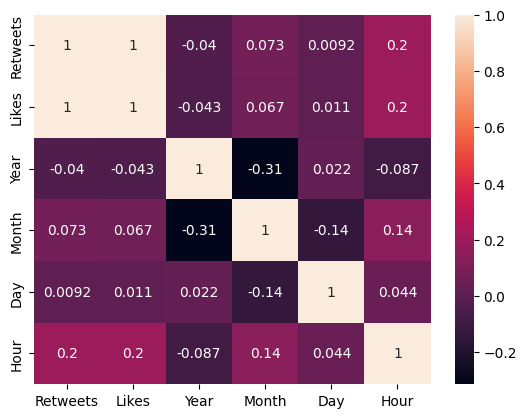

In [23]:
sns.heatmap(corr_matrix,annot=True)

<Axes: >

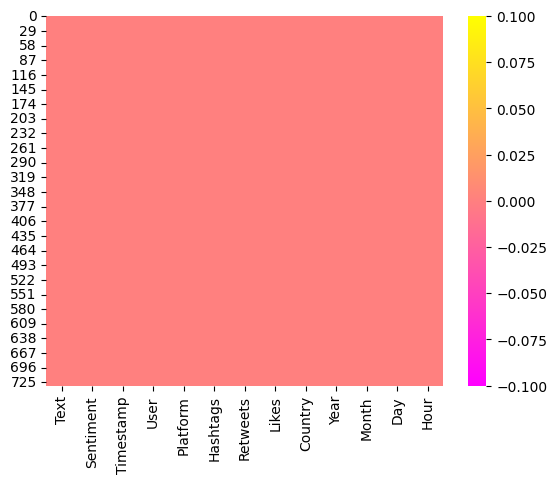

In [226]:
sns.heatmap(df.isnull(),cmap='spring')     #Checked  Null 

In [26]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [27]:
df[['Text']]

,Text
0,Enjoying a beautiful day at the park! ...
1,Traffic was terrible this morning. ...
2,Just finished an amazing workout! 💪 ...
3,Excited about the upcoming weekend getaway! ...
4,Trying out a new recipe for dinner tonight. ...
...,...
727,Collaborating on a science project that receiv...
728,Attending a surprise birthday party organized ...
729,Successfully fundraising for a school charity ...
730,"Participating in a multicultural festival, cel..."


In [28]:
print(df['Sentiment'].value_counts())

Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64


Text(0.5, 1.0, 'Post_Likes Distribution')

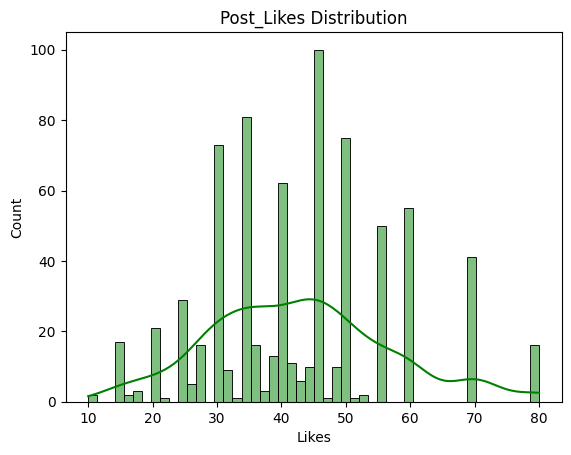

In [84]:
sns.histplot(df['Likes'],bins=50,color='green',kde=True)
plt.title("Post_Likes Distribution")


In [85]:
p = df.groupby(['Platform','Year'])
m=p.get_group(('Twitter',2020))
m

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
166,Jealousy consumes me as I witness others' suc...,Jealousy,2020-08-12 11:30:00,EnviousObserver,Twitter,#Jealousy #Envy,12.0,25.0,India,2020,8,12,11
172,Helplessness sinks in as challenges pile up. ...,Helplessness,2020-06-20 14:20:00,OverwhelmedHeart,Twitter,#Helplessness #Overwhelmed,8.0,15.0,Australia,2020,6,20,14
234,"Seeking serenity in the melody of raindrops, ...",Serenity,2020-04-12 19:30:00,RaindropHarmony,Twitter,#Serenity #RaindropMelody,25.0,50.0,Canada,2020,4,12,19
237,"Lost in the labyrinth of thoughts, confusion ...",Confusion,2020-06-05 12:15:00,ShadowedSeeker,Twitter,#Confusion #LabyrinthOfThoughts,14.0,28.0,Australia,2020,6,5,12
265,"Proudly scaling the peaks of achievement, a m...",Proud,2020-01-05 08:45:00,PeakConqueror,Twitter,#Proud #ScalingPeaks,23.0,46.0,USA,2020,1,5,8
271,"A free spirit soaring on the wings of dreams,...",Free-spirited,2020-06-10 10:05:00,DreamSoarer,Twitter,#FreeSpirit #WingsOfDreams,22.0,44.0,UK,2020,6,10,10
279,"Proudly scaling the peaks of achievement, a m...",Proud,2020-01-05 08:45:00,PeakConqueror,Twitter,#Proud #ScalingPeaks,23.0,46.0,USA,2020,1,5,8
285,"A free spirit soaring on the wings of dreams,...",Free-spirited,2020-06-10 10:05:00,DreamSoarer,Twitter,#FreeSpirit #WingsOfDreams,22.0,44.0,UK,2020,6,10,10
293,"Proudly scaling the peaks of achievement, a m...",Proud,2020-01-05 08:45:00,PeakConqueror,Twitter,#Proud #ScalingPeaks,23.0,46.0,USA,2020,1,5,8
367,Happiness blooms like flowers in a garden on a...,Happiness,2020-02-10 11:15:00,SunnyDayEnthusiast,Twitter,#Happiness #SunnyDay,15.0,30.0,India,2020,2,10,11


In [86]:
likes_by_year = df.groupby('Year')['Likes'].sum().reset_index()
print(likes_by_year)


    Year    Likes
0   2010    160.0
1   2011    185.0
2   2012    160.0
3   2013    175.0
4   2014    160.0
5   2015    859.0
6   2016   1661.0
7   2017   1785.0
8   2018   2505.0
9   2019   3224.0
10  2020   2917.0
11  2021   2648.0
12  2022   2737.0
13  2023  12228.0


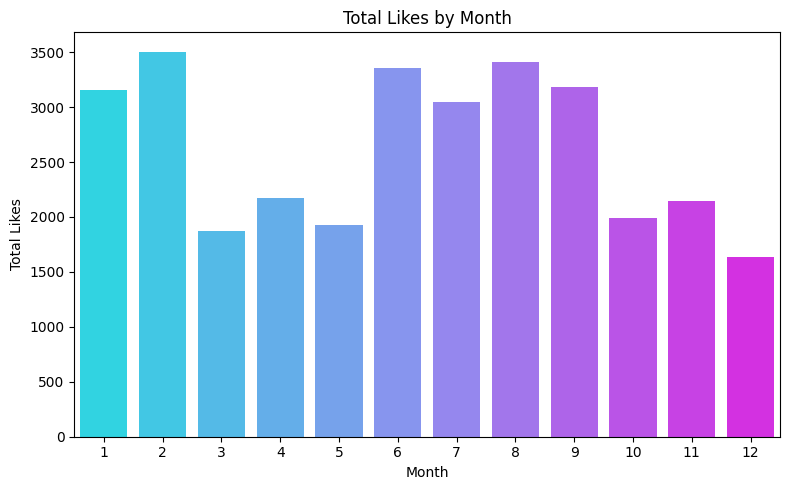

In [56]:
retweets_by_year = df.groupby('Month')['Likes'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=retweets_by_year, x='Month', y='Likes',palette='cool')

plt.title("Total Likes by Month")
plt.xlabel("Month")
plt.ylabel("Total Likes")
plt.tight_layout()
plt.show()


In [36]:
likes_by_year = df.groupby('Month')['Retweets'].sum().reset_index()
print(likes_by_year)

    Month  Retweets
0       1    1577.0
1       2    1753.0
2       3     937.0
3       4    1087.0
4       5     963.0
5       6    1683.0
6       7    1523.0
7       8    1718.0
8       9    1606.0
9      10    1006.0
10     11    1076.0
11     12     815.0


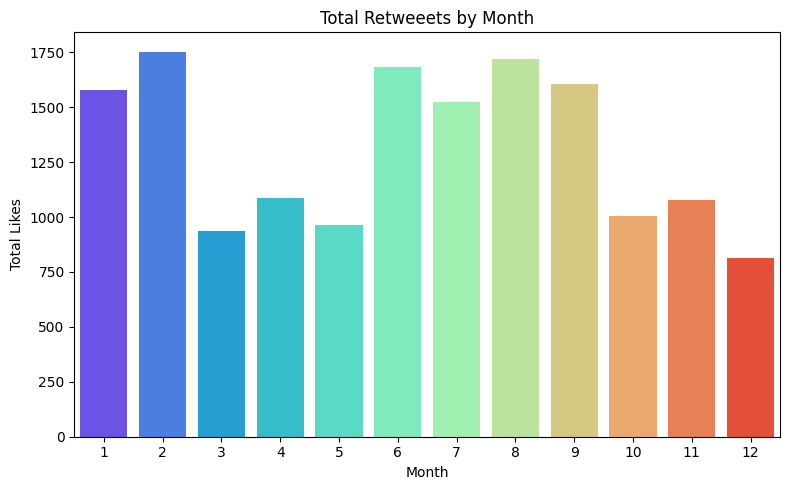

In [53]:
retweets_by_year = df.groupby('Month')['Retweets'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=retweets_by_year, x='Month', y='Retweets',palette='rainbow')

plt.title("Total Retweeets by Month")
plt.xlabel("Month")
plt.ylabel("Total Likes")
plt.tight_layout()
plt.show()


In [64]:
engagement_by_year = df.groupby('Year')[['Likes', 'Retweets']].sum().reset_index()
print(engagement_by_year)

    Year    Likes  Retweets
0   2010    160.0      80.0
1   2011    185.0      91.0
2   2012    160.0      80.0
3   2013    175.0      88.0
4   2014    160.0      80.0
5   2015    859.0     434.0
6   2016   1661.0     836.0
7   2017   1785.0     892.0
8   2018   2505.0    1253.0
9   2019   3224.0    1611.0
10  2020   2917.0    1458.0
11  2021   2648.0    1326.0
12  2022   2737.0    1367.0
13  2023  12228.0    6148.0


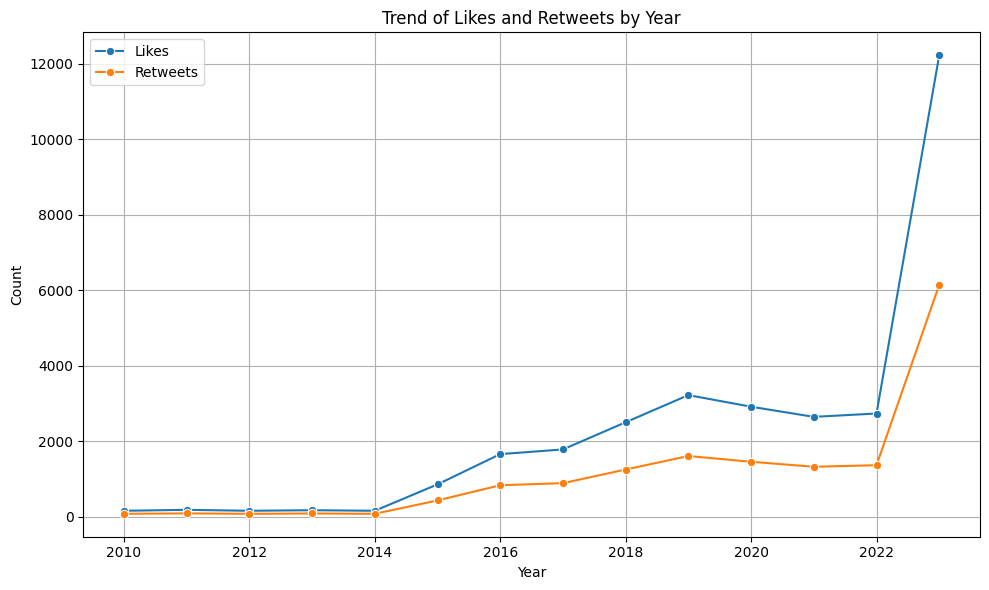

In [74]:
engagement_by_year = df.groupby('Year')[['Likes', 'Retweets']].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=engagement_by_year, x='Year', y='Likes', marker='o', label='Likes')
sns.lineplot(data=engagement_by_year, x='Year', y='Retweets', marker='o', label='Retweets')

plt.title("Trend of Likes and Retweets by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


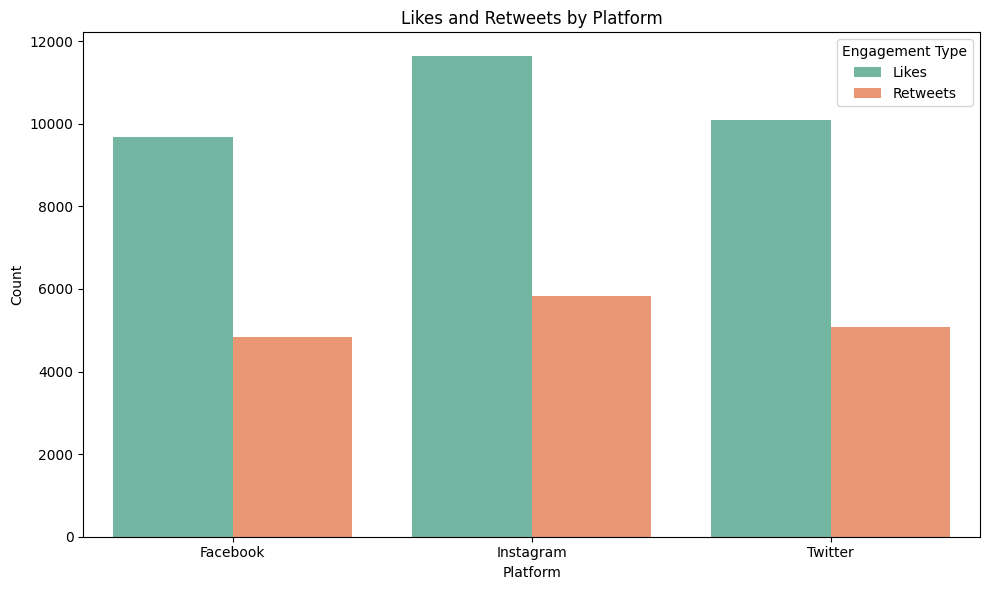

In [72]:
engagement_by_year = df.groupby('Platform')[['Likes', 'Retweets']].sum().reset_index()
plt.figure(figsize=(10, 6))
bar_data = pd.melt(engagement_by_year, id_vars='Platform', value_vars=['Likes', 'Retweets'], var_name='type', value_name='count')

sns.barplot(data=bar_data, x='Platform', y='count', hue='type', palette='Set2')

plt.title("Likes and Retweets by Platform")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.legend(title="Engagement Type")
plt.tight_layout()
plt.show()


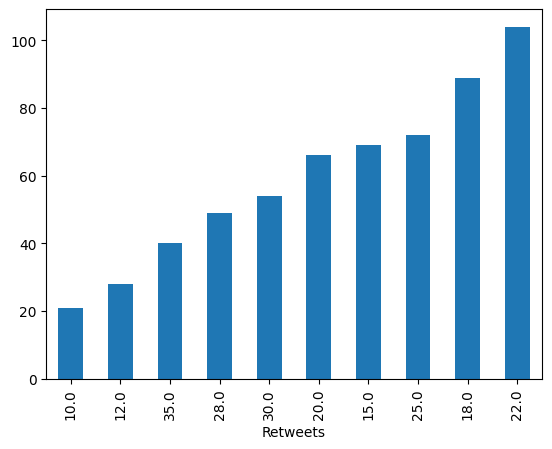

In [92]:
H_retweet= df.groupby('Hashtags')['Retweets'].max().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='bar')

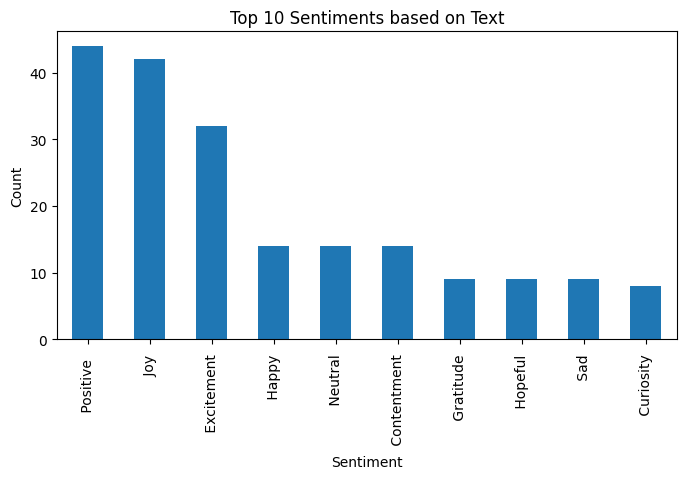

In [110]:
plt.figure(figsize=(8,4))
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


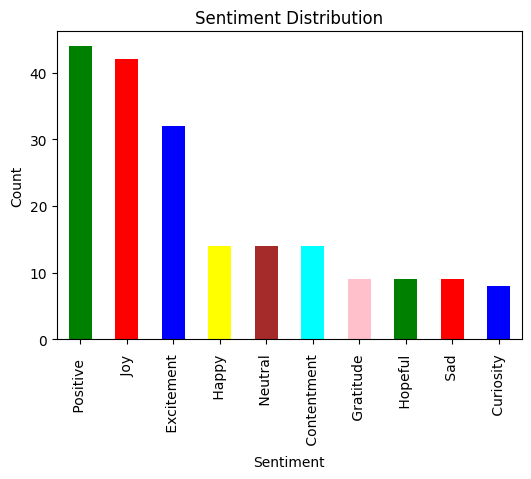

In [99]:
# Visualization - Sentiment Distribution
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar', color=['green', 'red', 'blue','yellow','brown','cyan','pink'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [100]:
df.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [101]:
## Investigate trends over time using the "Timestamp" column.     ## eliminate SS from time column
df['Time'] = df['Timestamp'].dt.strftime("%H:%M")
df['Date'] = df['Timestamp'].dt.strftime("%Y-%m-%d")

In [102]:
df.head(20)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Time,Date
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,12:30,2023-01-15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,08:45,2023-01-15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,15:45,2023-01-15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,18:20,2023-01-15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,19:55,2023-01-15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,09:10,2023-01-16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,14:45,2023-01-16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,19:30,2023-01-16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,08:00,2023-01-17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12,12:20,2023-01-17


In [103]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'Time',
       'Date'],
      dtype='object')

In [104]:
df.drop(columns="Time",inplace=True)

### By User Behaviour

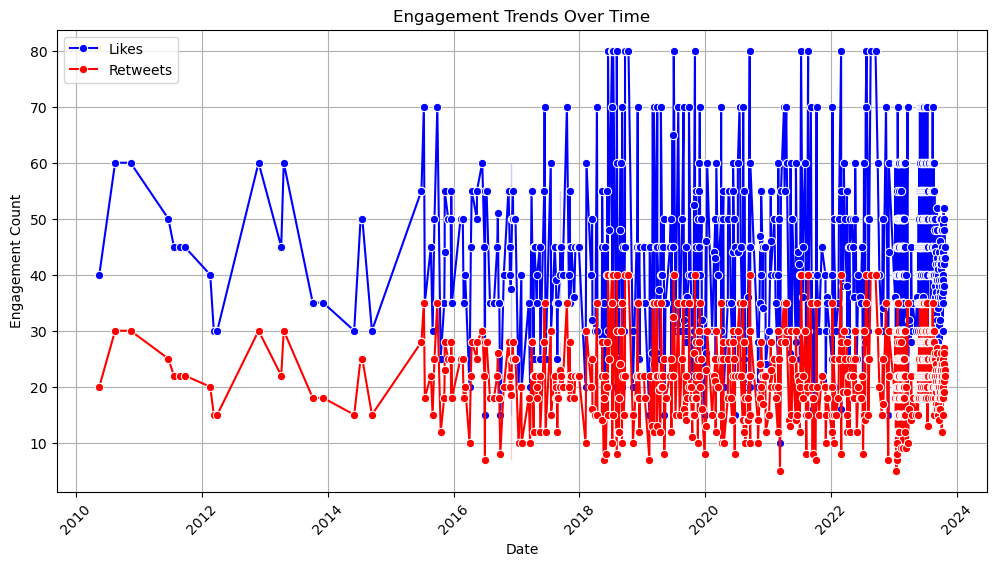

In [344]:
plt.figure(figsize=(12,6))

# Plot Likes over time
sns.lineplot(x=df["Timestamp"], y=df["Likes"], label="Likes", marker="o", color="b")

# Plot Retweets over time
sns.lineplot(x=df["Timestamp"], y=df["Retweets"], label="Retweets", marker="o", color="r")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Engagement Count")
plt.title("Engagement Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


### Most Liked & Retweets 

In [353]:
# Top 5 posts with most likes
top_liked = [df.nlargest(5, "Likes")[["Timestamp", "Text", "Likes", "Retweets"]]]

# Top 5 posts with most retweets
top_retweeted = [df.nlargest(5, "Retweets")[["Timestamp", "Text", "Likes", "Retweets"]]]

print("**Top 5 Most Liked Posts:**")
print(top_liked)

print("\n**Top 5 Most Retweeted Posts:**")
print(top_retweeted)


**Top 5 Most Liked Posts:**
[              Timestamp                                               Text  \
335 2020-09-15 14:45:00  Thrilled to witness the grandeur of a cultural...   
345 2022-02-28 07:15:00  Motivated to achieve fitness goals after an in...   
355 2022-07-25 10:00:00  Anticipation for an upcoming adventure in an e...   
368 2018-09-22 16:30:00  Elation over discovering a rare book in a quai...   
382 2018-07-08 23:00:00  A sense of wonder at the vastness of the cosmo...   

     Likes  Retweets  
335   80.0      40.0  
345   80.0      40.0  
355   80.0      40.0  
368   80.0      40.0  
382   80.0      40.0  ]

**Top 5 Most Retweeted Posts:**
[              Timestamp                                               Text  \
335 2020-09-15 14:45:00  Thrilled to witness the grandeur of a cultural...   
345 2022-02-28 07:15:00  Motivated to achieve fitness goals after an in...   
355 2022-07-25 10:00:00  Anticipation for an upcoming adventure in an e...   
368 2018-09-22 16

In [355]:
import seaborn as sns

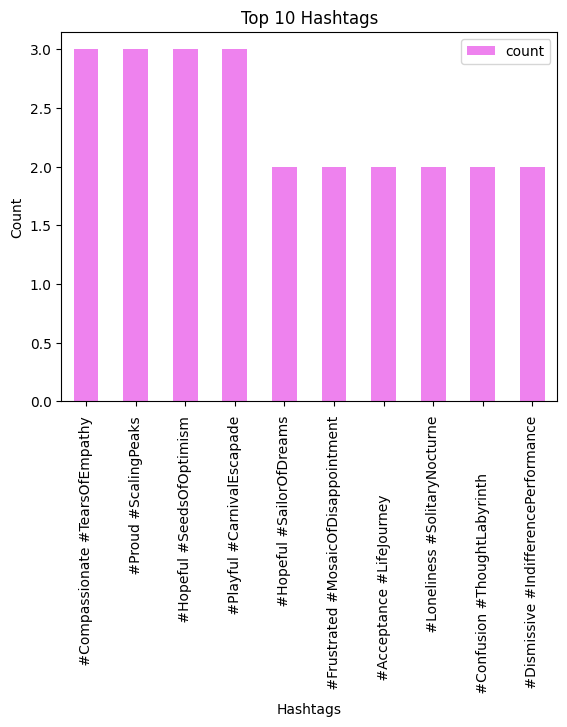

In [183]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar',color="violet")
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [122]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


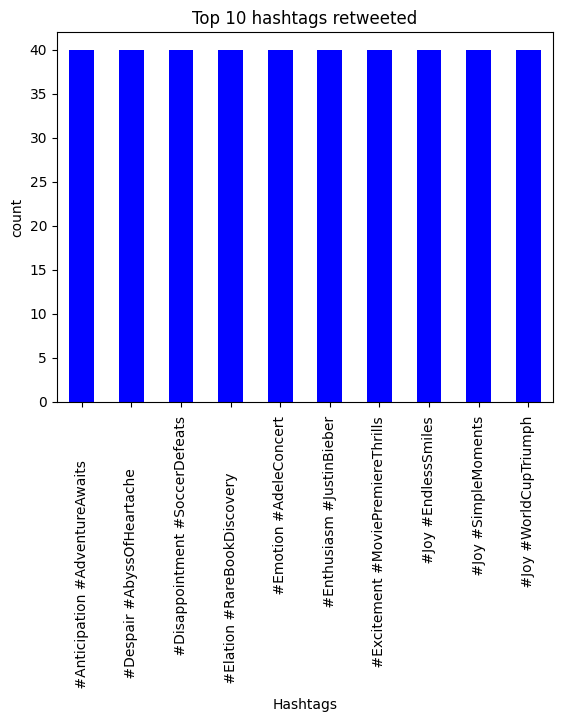

In [179]:
H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar',color="blue")
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

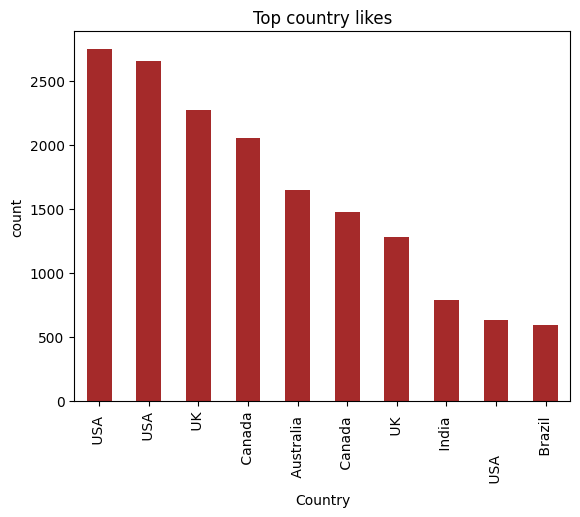

In [178]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar',color='brown')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [174]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

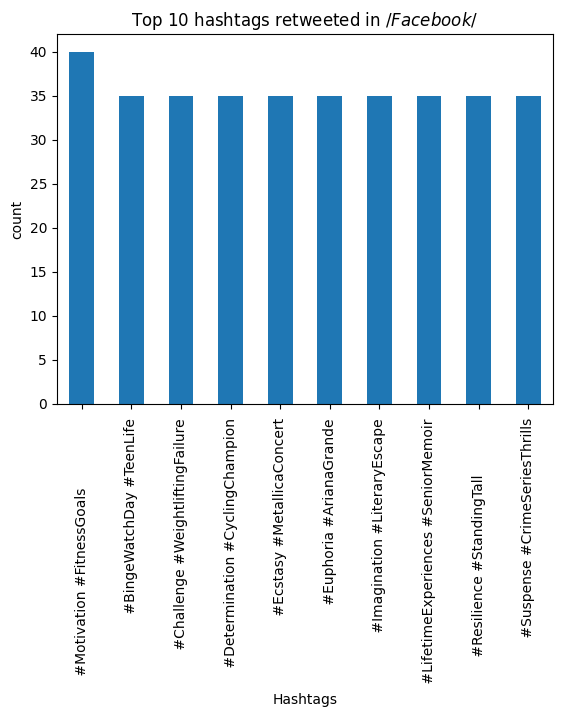

In [175]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

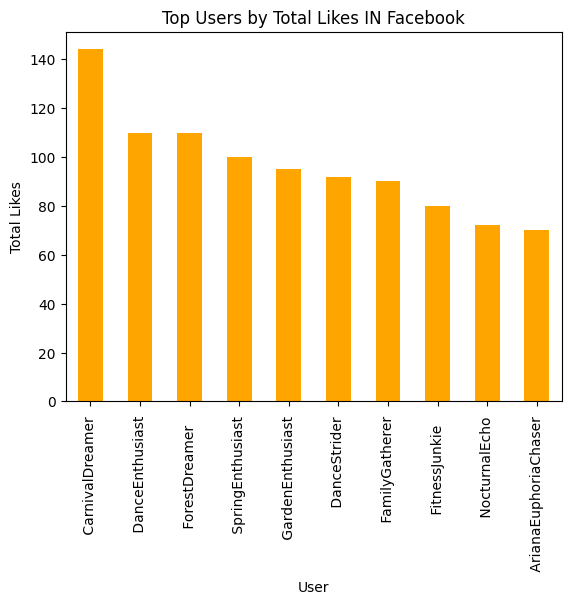

In [176]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar',color="orange")
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

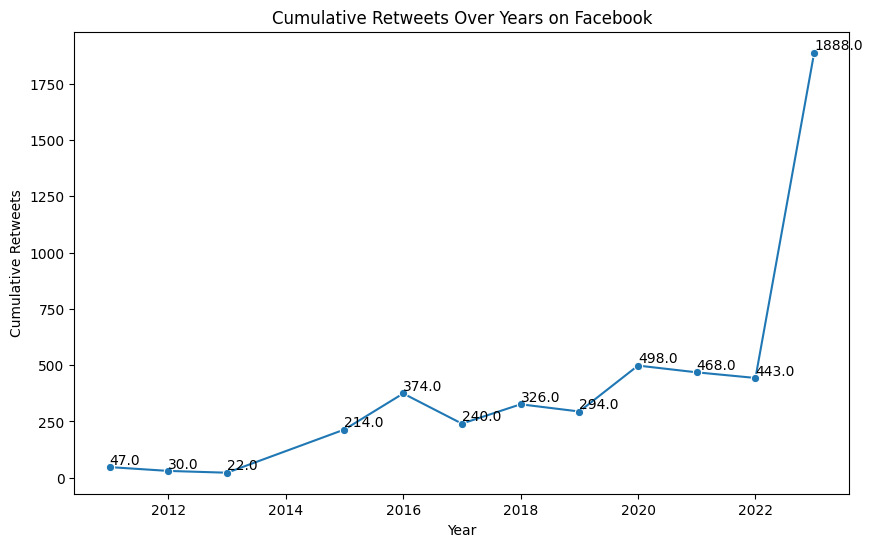

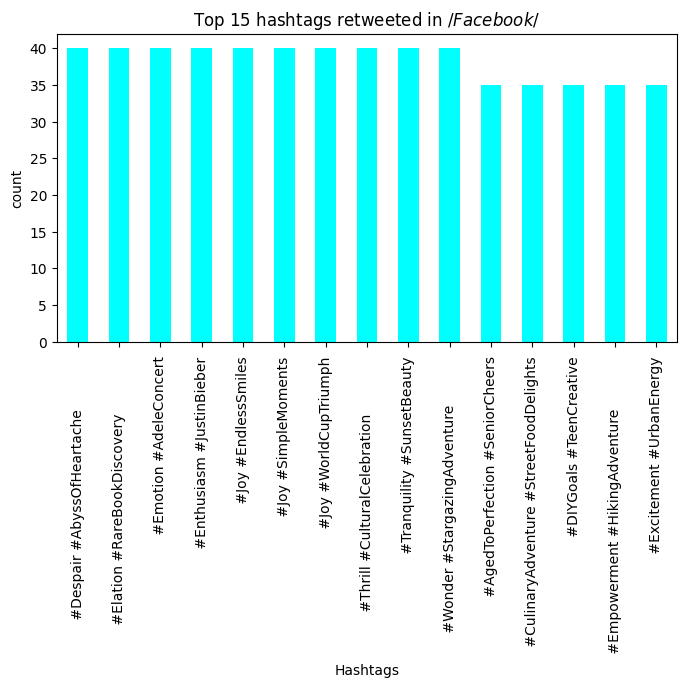

In [142]:
facebook= df[df['Platform'] == 'Faceboook']
H_R_i=instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
plt.figure(figsize=(8,4))
H_R_i.plot(kind='bar',color="cyan")
plt.title('Top 15 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

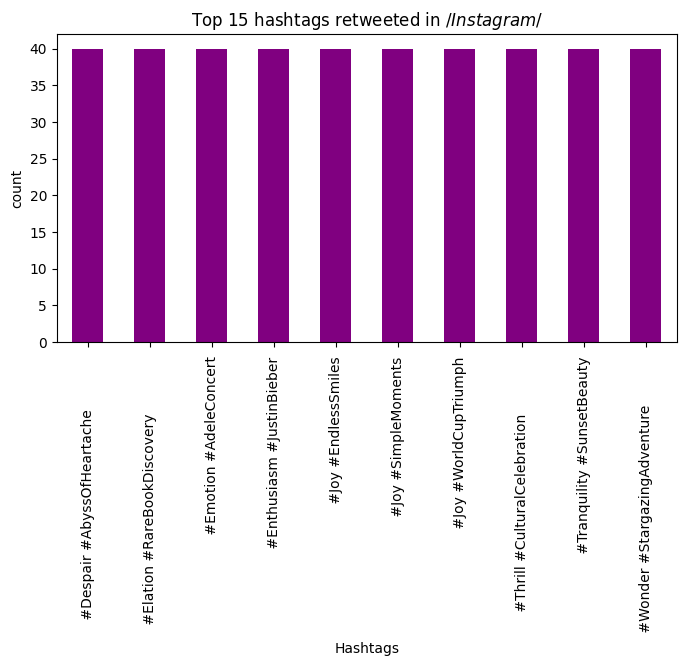

In [143]:
instagram= df[df['Platform'] == 'Instagram']
H_R_i=instagram.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(8,4))
H_R_i.plot(kind='bar',color="purple")
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

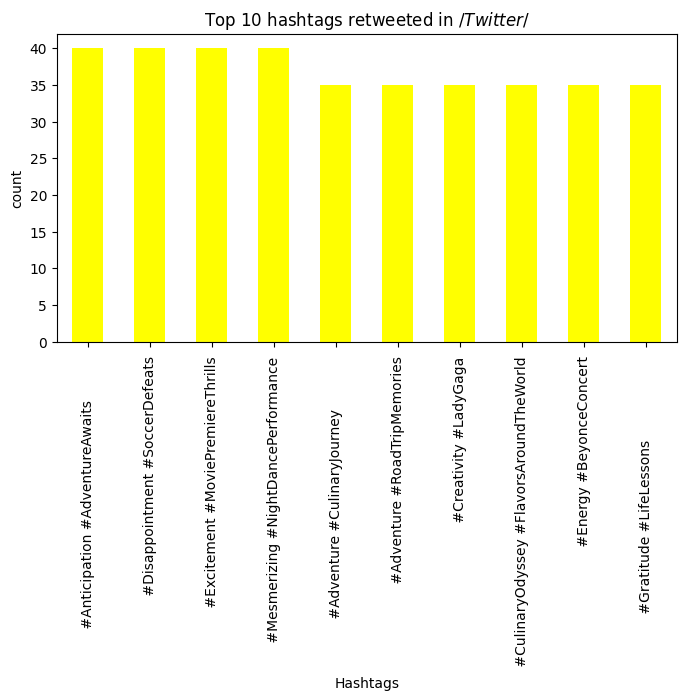

In [144]:
twitter= df[df['Platform'] == 'Twitter']
H_R_t=twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(8,4))
H_R_t.plot(kind='bar',color="yellow")
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()


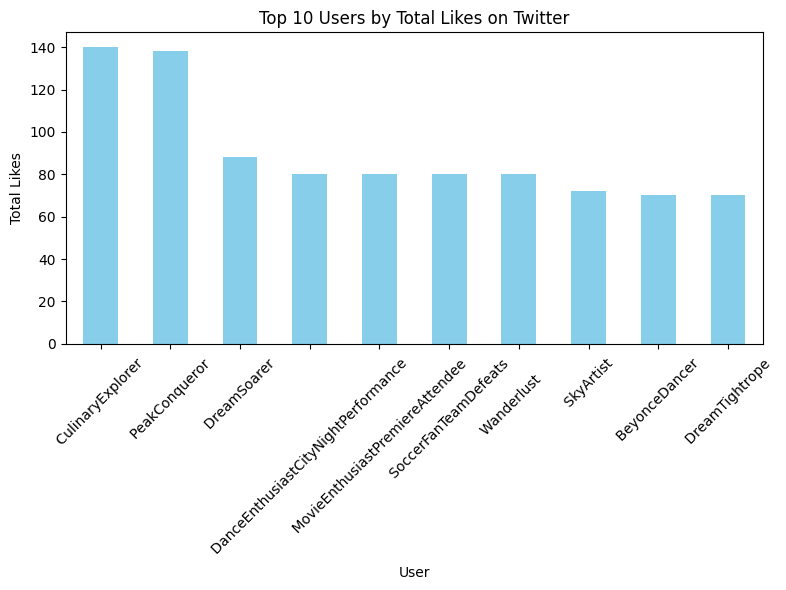

In [146]:
twitter_data = df[df['Platform'] == 'Twitter']
top_likes_platform_t = twitter_data.groupby('User')['Likes'].sum().nlargest(10)

plt.figure(figsize=(8,6))
top_likes_platform_t.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Total Likes on Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


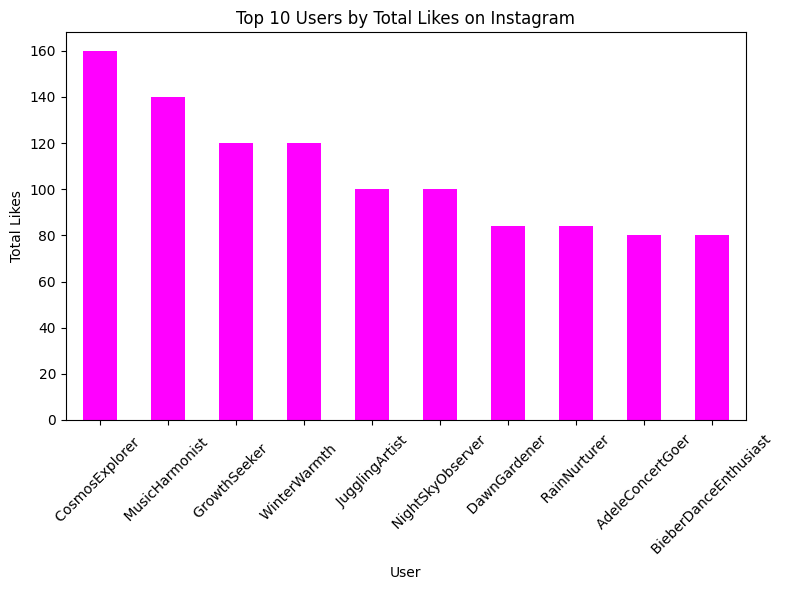

In [147]:
instagram_data = df[df['Platform'] == 'Instagram']
top_likes_platform_t = instagram_data.groupby('User')['Likes'].sum().nlargest(10)

plt.figure(figsize=(8,6))
top_likes_platform_t.plot(kind='bar', color='magenta')
plt.title('Top 10 Users by Total Likes on Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


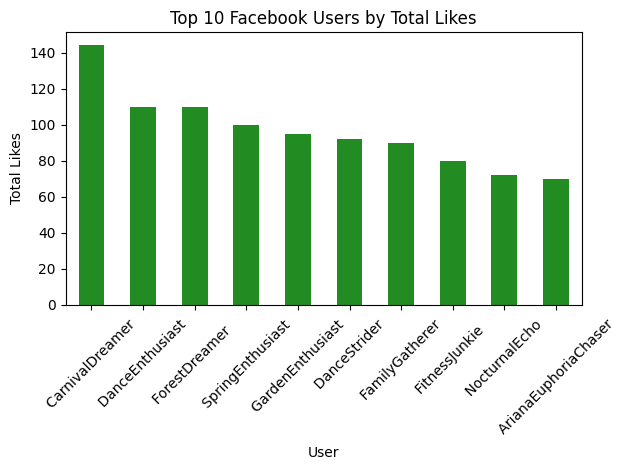

In [192]:
import matplotlib.pyplot as plt

# Filter data for Twitter platform
facebook_data = df[df['Platform'] == 'Facebook']

# Group by User and sum Likes
top_likes_platform_t = facebook_data.groupby('User')['Likes'].sum().nlargest(10)

# Plotting
top_likes_platform_t.plot(kind='bar', color='forestgreen')
plt.title('Top 10 Facebook Users by Total Likes')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


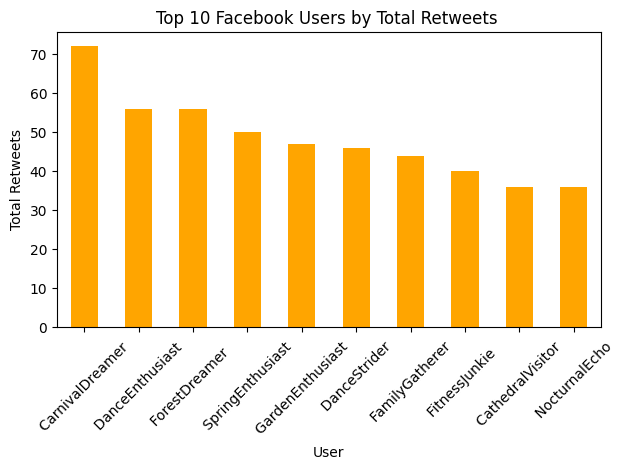

In [204]:
facebook_data = df[df['Platform'] == 'Facebook']

# Group by User and sum Likes
top_likes_platform_t = facebook_data.groupby('User')['Retweets'].sum().nlargest(10)

# Plotting
top_likes_platform_t.plot(kind='bar', color='orange')
plt.title('Top 10 Facebook Users by Total Retweets ')
plt.xlabel('User')
plt.ylabel('Total Retweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


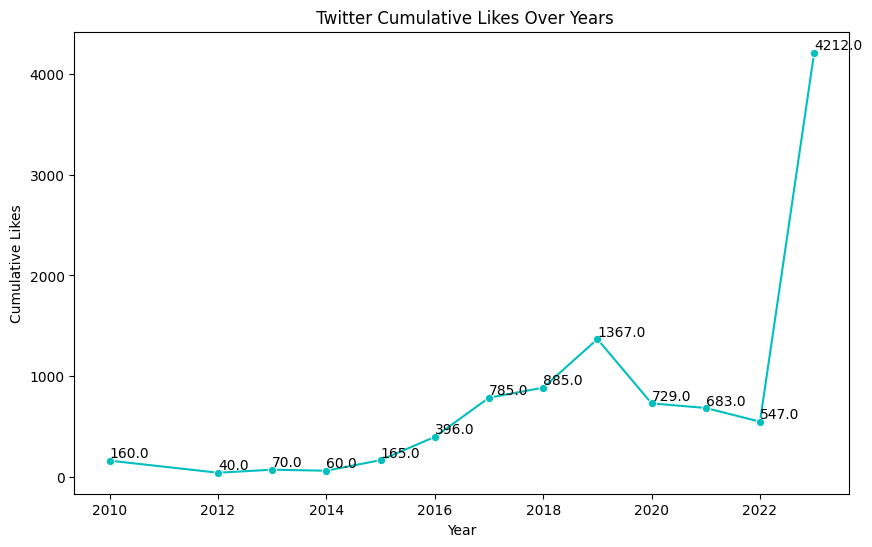

In [191]:
twiteer=df[df["Platform"] == "Twitter"]
f = twitter.groupby(['Year'])['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes',legend="brief", marker='o',color="c")
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title(' Twitter Cumulative Likes Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

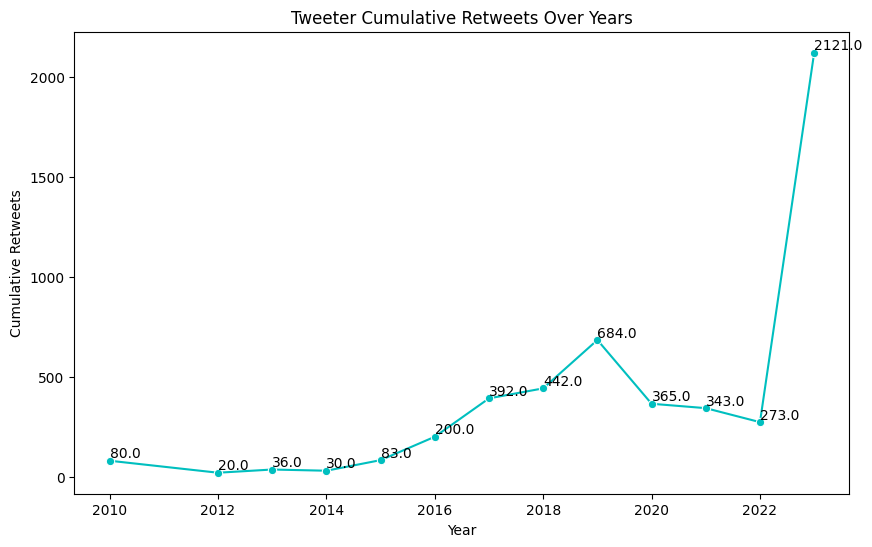

In [193]:
twitter=df[df["Platform"] == "Twitter"]
f = twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o',color="c")
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Tweeter Cumulative Retweets Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')
plt.show()

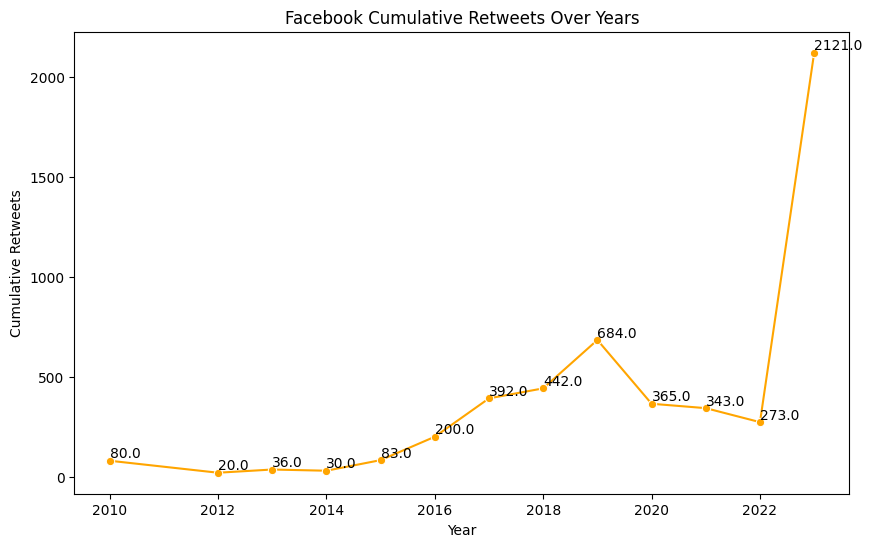

In [196]:
facebook_data = df[df['Platform'] == 'Facebook']
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o',color="orange")
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Facebook Cumulative Retweets Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

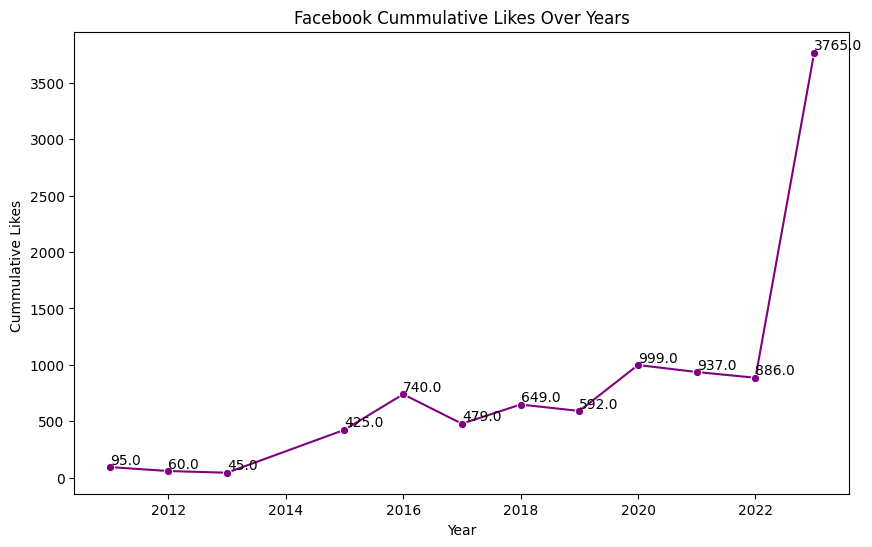

In [201]:
facebook_data = df[df['Platform'] == 'Facebook']
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o',color="purple")
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Facebook Cummulative Likes Over Years')
plt.xlabel('Year')
plt.ylabel('Cummulative Likes ')

plt.show()

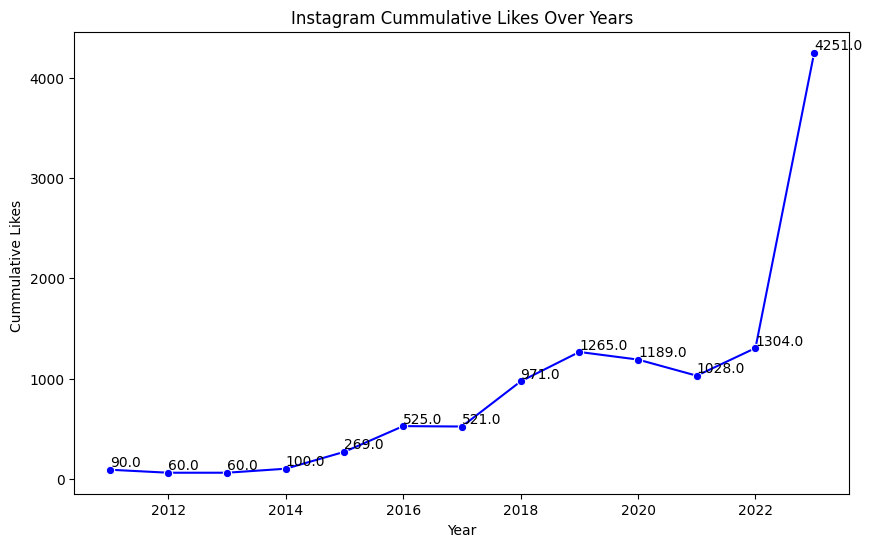

In [198]:
instagram = df[df['Platform'] == 'Instagram']
f = instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o',color="blue")
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Instagram Cummulative Likes Over Years')
plt.xlabel('Year')
plt.ylabel('Cummulative Likes ')

plt.show()

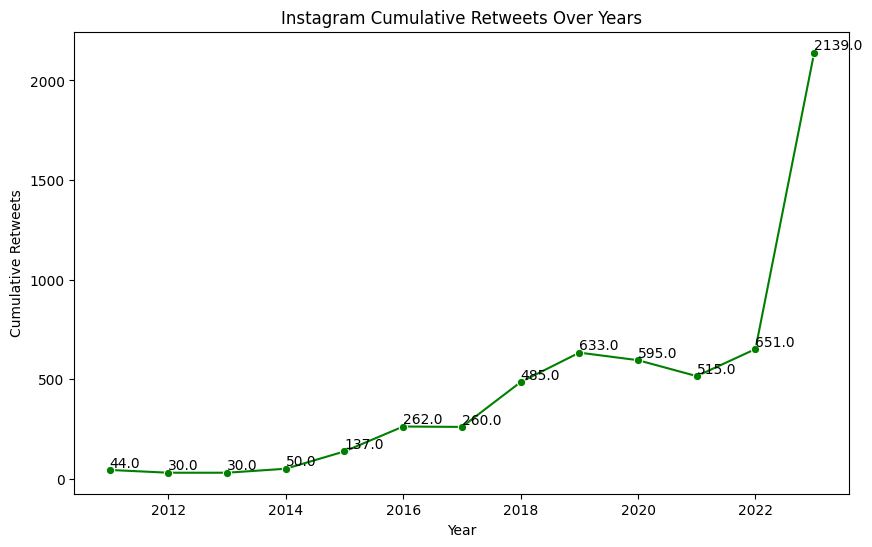

In [205]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o',color="green")
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Instagram Cumulative Retweets Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

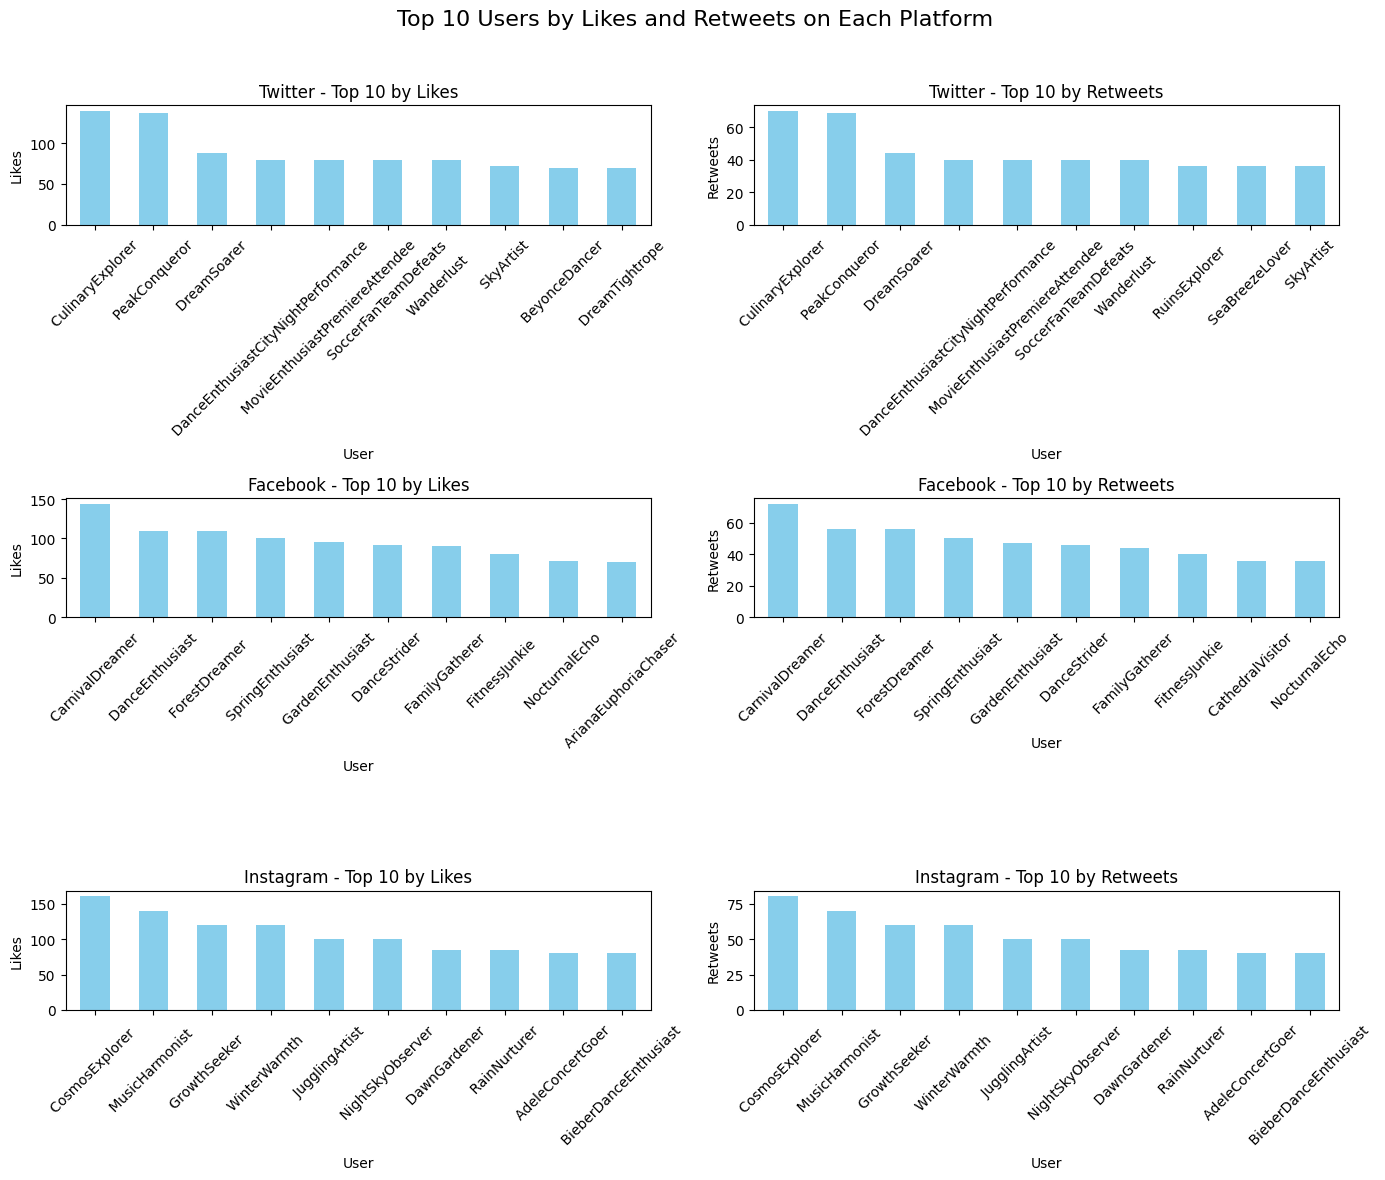

In [184]:

platforms = ['Twitter', 'Facebook', 'Instagram']
metrics = ['Likes', 'Retweets']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Top 10 Users by Likes and Retweets on Each Platform', fontsize=16)

# Loop through platforms and metrics
for i, platform in enumerate(platforms):
    platform_data = df[df['Platform'] == platform]

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        top_users = platform_data.groupby('User')[metric].sum().nlargest(10)
        top_users.plot(kind='bar', ax=ax, color='skyblue')

        ax.set_title(f'{platform} - Top 10 by {metric}')
        ax.set_xlabel('User')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


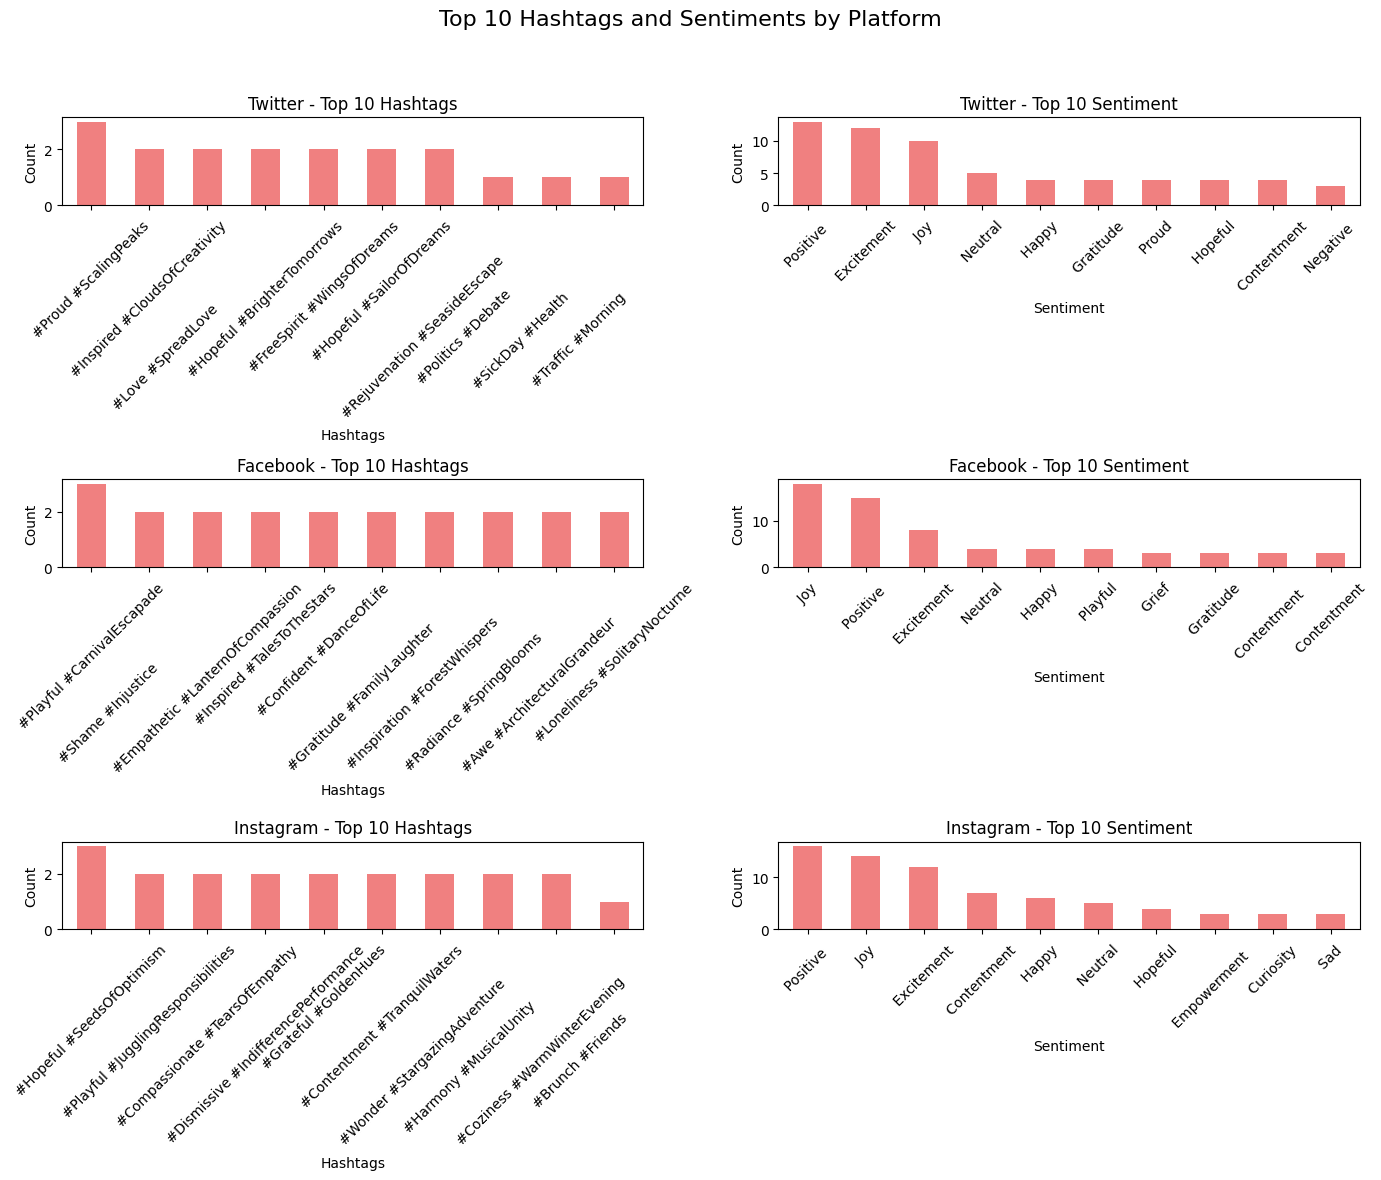

In [186]:
import matplotlib.pyplot as plt

# Platforms to analyze
platforms = ['Twitter', 'Facebook', 'Instagram']
categories = ['Hashtags', 'Sentiment']

# Create subplot grid: 3 rows (platforms) x 2 columns (Hashtags & Sentiments)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Top 10 Hashtags and Sentiments by Platform', fontsize=16)

# Loop through each platform and category
for i, platform in enumerate(platforms):
    platform_data = df[df['Platform'] == platform]

    for j, category in enumerate(categories):
        ax = axes[i, j]
        top_values = platform_data[category].value_counts().nlargest(10)
        top_values.plot(kind='bar', ax=ax, color='lightcoral')

        ax.set_title(f'{platform} - Top 10 {category}')
        ax.set_xlabel(category)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


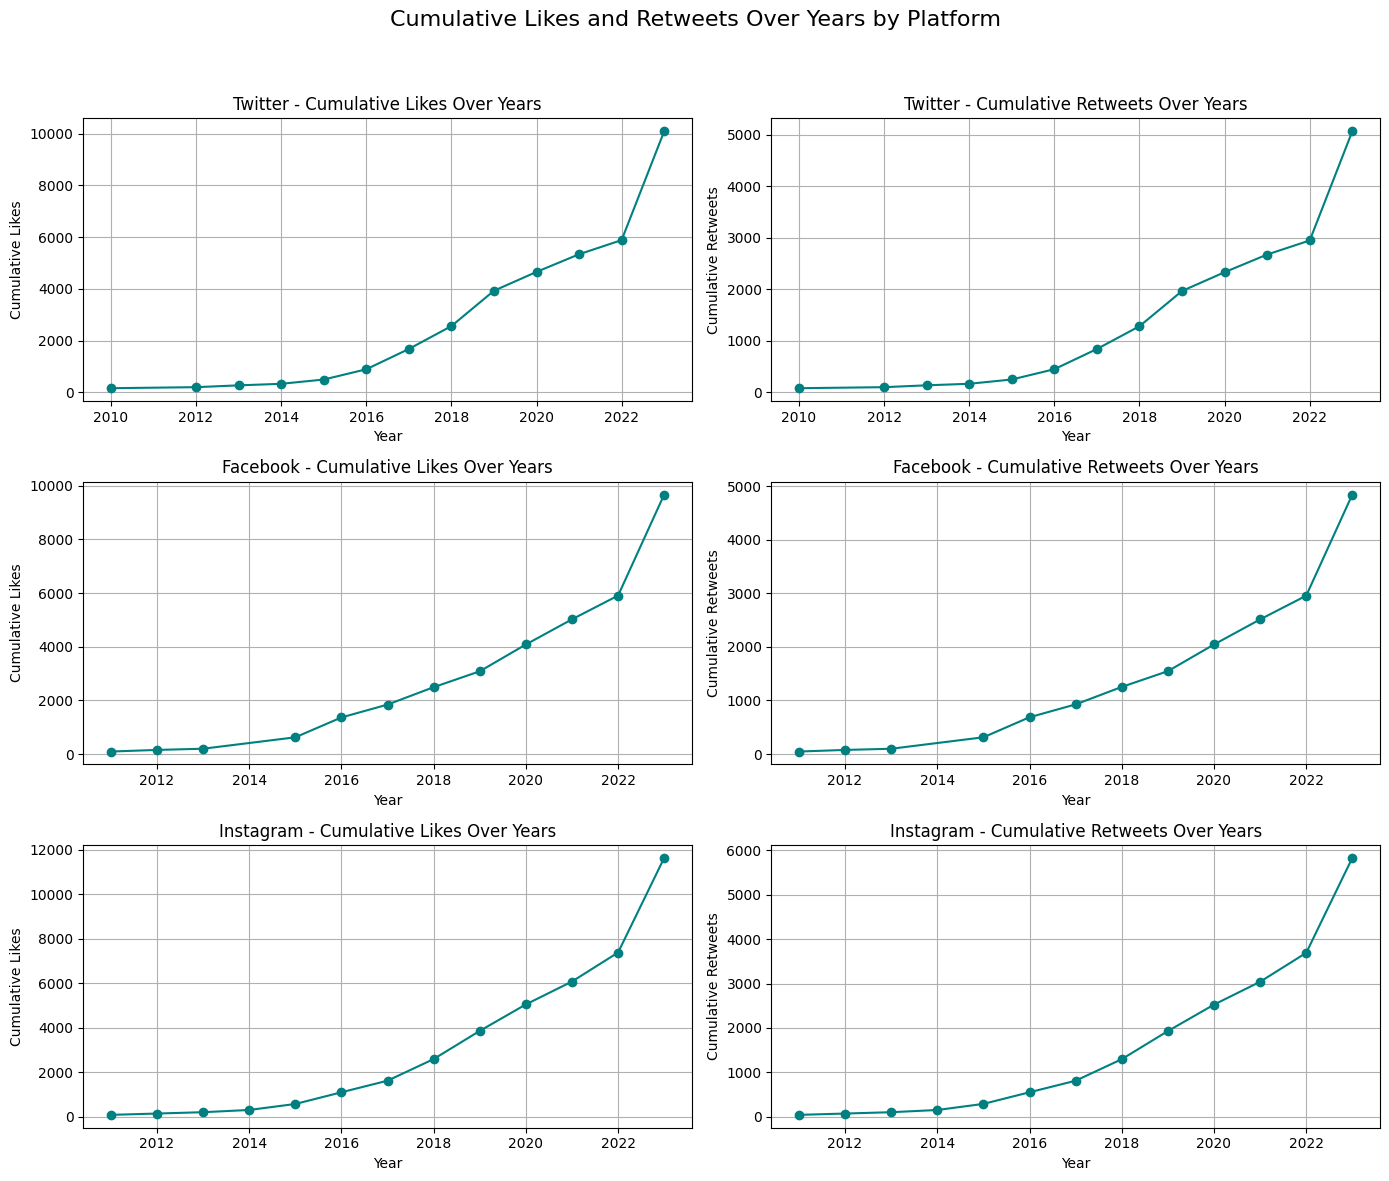

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Platforms and metrics
platforms = ['Twitter', 'Facebook', 'Instagram']
metrics = ['Likes', 'Retweets']

# Create subplot: 3 rows (platforms) x 2 columns (Likes & Retweets)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Cumulative Likes and Retweets Over Years by Platform', fontsize=16)

# Loop through platforms and metrics
for i, platform in enumerate(platforms):
    platform_data = df[df['Platform'] == platform]

    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        # Group by year and calculate cumulative sum
        yearly_data = (
            platform_data.groupby('Year')[metric]
            .sum()
            .cumsum()  # Cumulative sum over years
        )

        yearly_data.plot(kind='line', marker='o', ax=ax, color='teal')
        ax.set_title(f'{platform} - Cumulative {metric} Over Years')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'Cumulative {metric}')
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


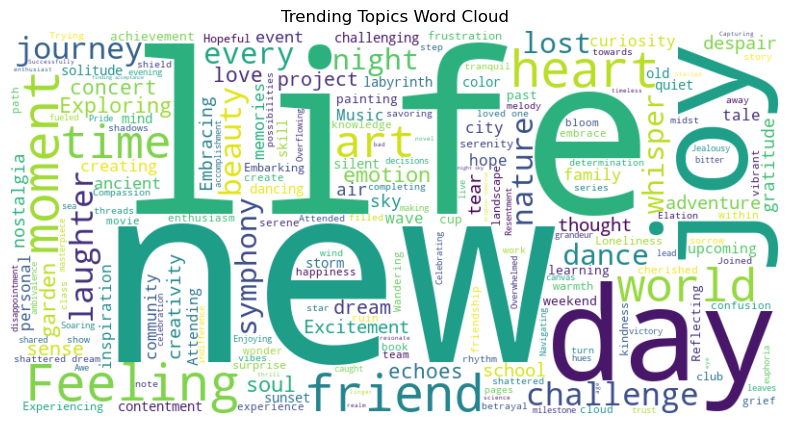

In [170]:
# Word Cloud for Trending Topics
all_words = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Trending Topics Word Cloud")
plt.show()

# Thank You !

#  <font color= CYAN>SOCIAL MEDIA SENTIMENT ANALYSIS